1
|    |   order_id |   quantity | item_name                             | choice_description                                                                                                 | item_price   |
|---:|-----------:|-----------:|:--------------------------------------|:-------------------------------------------------------------------------------------------------------------------|:-------------|
|  0 |          1 |          1 | Chips and Fresh Tomato Salsa          | nan                                                                                                                | $2.39        |
|  1 |          1 |          1 | Izze                                  | [Clementine]                                                                                                       | $3.39        |
|  2 |          1 |          1 | Nantucket Nectar                      | [Apple]                                                                                                  

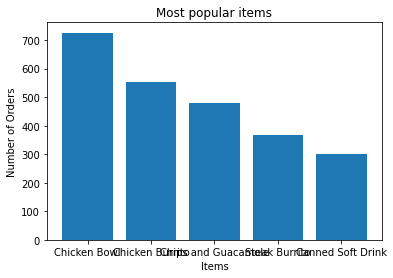

19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


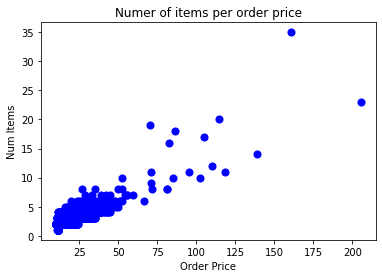

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Solution:
    def __init__(self) -> None:
        file = '/content/chipotle.tsv'
        self.chipo =pd.read_csv(file,sep='\t')
    
    def top_x(self, count) -> None:
        topx = self.chipo.head(count)
        print(topx.to_markdown())
        
    def count(self) -> int:
        return len(self.chipo.index)
    
    def info(self) -> None:
        print(self.chipo.info())
        pass
    
    def num_column(self) -> int:
        return self.chipo.shape[1]
    
    def print_columns(self) -> None:
        print(list(self.chipo[:]))
        pass
    
    def most_ordered_item(self):
        new_df=self.chipo.groupby(self.chipo['item_name']).sum()
        item_name=new_df['quantity'].idxmax()
        quantity=max(new_df['quantity'])
        order_id = new_df.loc[item_name,'order_id']
        return item_name, order_id, quantity

    def total_item_orders(self) -> int:
        return self.chipo['quantity'].sum()
   
    def total_sales(self) -> float:
        Temp=self.chipo['item_price'].apply(lambda X : X.replace('$',''))
        Temp=Temp.apply(lambda X : float(X))
        #Temp = self.chipo['item_price'].str.replace('$','')
        #Temp = Temp.astype(float)
        Ans=Temp*self.chipo['quantity']
        return Ans.sum()
   
    def num_orders(self) -> int:
        return len(self.chipo['order_id'].unique())
    
    def average_sales_amount_per_order(self) -> float:
        A=self.total_sales()
        B=np.float64(len(self.chipo['order_id'].unique()))
        C=A/B
        C=round(C,2)
        return C

    def num_different_items_sold(self) -> int:
        return len(self.chipo['item_name'].unique())
    
    def plot_histogram_top_x_popular_items(self, x:int) -> None:
        from collections import Counter
        letter_counter = Counter(self.chipo.item_name)
        letter_counter_x=letter_counter.most_common(x)
        K=list()
        V=list()
        for i in letter_counter_x:
          K.append(i[0])
          V.append(i[1])
        plt.bar(K,V)
        plt.xlabel('Items') 
        plt.ylabel('Number of Orders') 
        plt.title("Most popular items")
        plt.show(block=True)
        pass
        
    def scatter_plot_num_items_per_order_price(self) -> None:
        self.chipo['item_price'] = self.chipo['item_price'].str.replace('$','')
        self.chipo['item_price'] = self.chipo['item_price'].astype(float)
        new_df=self.chipo.groupby(self.chipo['order_id']).sum()
        plt.scatter(new_df['item_price'],new_df['quantity'],s=50,c='b')
        plt.xlabel('Order Price') 
        plt.ylabel('Num Items') 
        plt.title("Numer of items per order price")
        plt.show(block=True)
        pass
    
        

solution = Solution()
print('1')
solution.top_x(10)
print('2')
count = solution.count()
print('3')
print(count)
print('4')
assert count == 4622
print('5')
solution.info()
print('6')
count = solution.num_column()
print('7')
assert count == 5
solution.print_columns()
print('8')
item_name, order_id, quantity = solution.most_ordered_item()
print(item_name)
print(order_id)
print(quantity)
print('9')
assert item_name == 'Chicken Bowl'
print('10')
assert order_id == 713926	
print('11')
#assert quantity == 159 #----------------------------------------------
print('12')
total = solution.total_item_orders()
print(total)
print('13')
assert total == 4972
print('14')
assert 39237.02 == solution.total_sales()
print('15')
assert 1834 == solution.num_orders()
print('16')
assert 21.39 == solution.average_sales_amount_per_order()
print('17')
assert 50 == solution.num_different_items_sold()
print('18')
solution.plot_histogram_top_x_popular_items(5)
print('19')
solution.scatter_plot_num_items_per_order_price()